In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Medical_Examiner_Cases_20250922.csv')

/var/folders/k3/r7m20jrj64l36xss8gj7dr1r0000gn/T/ipykernel_7167/3773183368.py:1: DtypeWarning: Columns (24,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Medical_Examiner_Cases_20250922.csv')


In [3]:
data.shape

(86441, 34)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86441 entries, 0 to 86440
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Row Number                               86441 non-null  int64  
 1   Year                                     86441 non-null  int64  
 2   Quarter                                  86441 non-null  object 
 3   Age in Years                             85931 non-null  float64
 4   Death Date                               86439 non-null  object 
 5   Security Status                          86441 non-null  object 
 6   Gender                                   86420 non-null  object 
 7   Race                                     86194 non-null  object 
 8   Ethnic Group (Standardized)              86387 non-null  object 
 9   Manner of Death                          86440 non-null  object 
 10  Manner Type                              80744

In [5]:
data.isnull().sum()

Row Number                                     0
Year                                           0
Quarter                                        0
Age in Years                                 510
Death Date                                     2
Security Status                                0
Gender                                        21
Race                                         247
Ethnic Group (Standardized)                   54
Manner of Death                                1
Manner Type                                 5697
Manner Type (Standardized)                   313
Manner Sub Type                            57164
Manner Sub Type (Standardized)             46107
Opioid Related                               330
Coronado Bridge Related (Suicide Cases)     3119
Cause of Death                               326
Contributing Conditions                    49612
How Injury Occurred                        31886
Event Date                                 30412
Event Time          

In [6]:
amount_per_cause_of_death = data['Manner of Death'].groupby(data['Manner of Death']).count().reset_index(name = '# per')
amount_per_cause_of_death = amount_per_cause_of_death.sort_values(by='# per', ascending = False)
print(amount_per_cause_of_death)

         Manner of Death  # per
0               Accident  39327
2                Natural  31183
5                Suicide  10810
1               Homicide   3414
6           Undetermined   1381
4  Pending Investigation    324
3         Not Applicable      1


<Axes: xlabel='Manner of Death'>

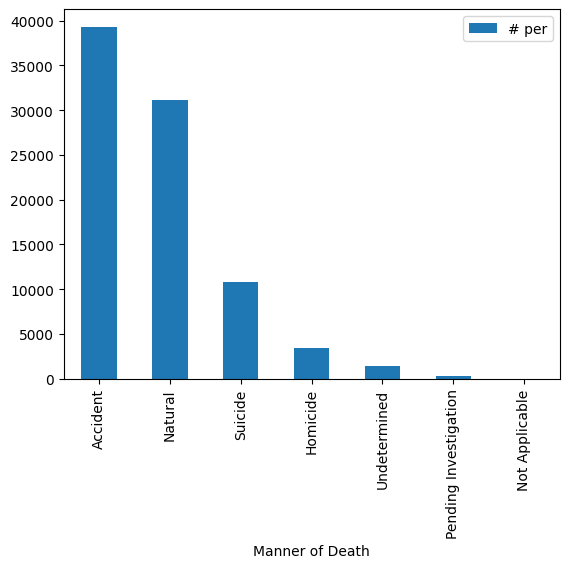

In [7]:
import matplotlib as plt
firstPlot = pd.DataFrame(amount_per_cause_of_death)
firstPlot.plot.bar(x='Manner of Death', y = '# per')